<a href="https://colab.research.google.com/github/bhavithakoki/CODTECHML/blob/main/analysis%20of%20movie%20review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
import pandas as pd

# Try to read the file, handling bad lines
data = pd.read_csv('IMDB Dataset.csv', on_bad_lines='skip', engine='python')
# on_bad_lines='skip' will skip any lines that cause errors
# engine='python' uses the Python engine which is more robust but slower

data.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [15]:
data.sample(10)

,review,sentiment
44657,"As a SCUBA diver, I can appreciate the incredi...",positive
25579,I absolutely hated this movie. Even though the...,negative
23143,"As Joe Bob Briggs would say, this movie relies...",negative
15248,"Unlike most people who've commented, I was bor...",positive
18945,What can I add that the previous comments have...,positive
33387,I wish I'd known more about this movie when I ...,negative
47415,"Despite the feelings of most ""Star Wars"" fans,...",positive
3665,"Like too many recent British films, this one t...",negative
8731,"Nice, pleasant, and funny, but not earth-shatt...",positive
32644,There have been many excellent comments about ...,positive


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [17]:
data.duplicated().sum()

418

In [18]:
data = data.drop_duplicates(subset=['review']).reset_index(drop=True)

In [19]:
data['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [20]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

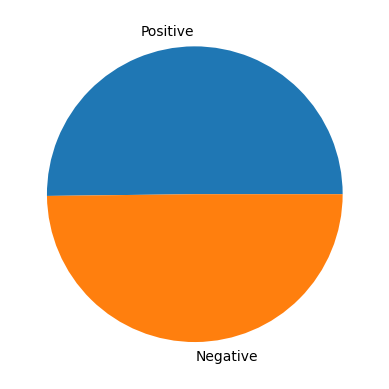

In [21]:
data_dist = [
    len(data[data['sentiment']=='positive']),
    len(data[data['sentiment']=='negative'])
]
labels = ['Positive','Negative']
plt.pie(data_dist, labels = labels)
plt.show

In [22]:
import re

In [23]:
def removeHTML(text):
    text = re.sub(r'<[^>]*>', '', text)
    return(text)

In [25]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
def removeStopWords(text):
    words = text.lower().split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)
    return(text)

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def Lemmatizing(text):
    text = lemmatizer.lemmatize(text)
    return(text)

In [28]:
def removeNoise(text):
    text = re.sub(r'[^a-zA-Z\s]+', '', text) # Only keep English letters
    text = re.sub(r'(\w)\1{2,}', r'\1', text)   #Normalize Repeated Letters
    text = re.sub(r'\s{2,}', ' ', text).strip() # Removing extra spaces
    return(text)

In [29]:
CleanedText = []

In [30]:

for i in range(len(data)):
    text = data.review[i]
    text = removeHTML(text)
    text = removeStopWords(text)
    text = Lemmatizing(text)
    text = removeNoise(text)
    CleanedText.append(text)

In [31]:
data['CleanedText'] = CleanedText

In [32]:
data.head()

,review,sentiment,CleanedText
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching oz episode ho...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [33]:
data.sample(20)

,review,sentiment,CleanedText
49046,Edward Burtynsky is a Canadian photographer wh...,positive,edward burtynsky canadian photographer makes a...
29088,It's simply ridiculous how underrated this mov...,positive,simply ridiculous underrated movie is one funn...
13680,"All in all, don't expect much and you won't be...",negative,all expect much disappointedand want see movie...
15462,This Fox spectacle was a big hit when released...,positive,fox spectacle big hit released sumptiously pro...
13360,Badland is one of the worst movies I ever seen...,negative,badland one worst movies ever seen time fine g...
35555,"Alejandro Amenabar, the young and talented Spa...",positive,alejandro amenabar young talented spanish dire...
615,It starts out like a very serious social comme...,negative,starts like serious social commentary quickly ...
40653,Just before dawn is an underrated horror film ...,positive,dawn underrated horror film early eighties see...
5456,Pieced (edited) together from dead body parts ...,negative,pieced edited together dead body parts deleted...
33676,"Although I gave a rating of ""9"", my expectatio...",positive,although gave rating expectations higher film ...


In [34]:
from sklearn.model_selection import train_test_split

In [35]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

In [37]:
X_train = vectorizer.fit_transform(train['CleanedText'])
X_test = vectorizer.transform(test['CleanedText'])

In [38]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

In [39]:
from sklearn.naive_bayes import MultinomialNB

In [40]:
mnb = MultinomialNB()

mnb.fit(X_train, train['sentiment'])

MultinomialNB()

In [41]:
pred_y_mnb = mnb.predict(X_test)

In [42]:
print('Classification Report:\n')
print(classification_report(test['sentiment'], pred_y_mnb))
print('_'*100)
print('Accuracy:',accuracy_score(test['sentiment'], pred_y_mnb))
print('_'*100)
print('F1 Score:',f1_score(test['sentiment'], pred_y_mnb, average='weighted'))

Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.87      0.86      4909
    positive       0.87      0.85      0.86      5008

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

____________________________________________________________________________________________________
Accuracy: 0.8557023293334678
____________________________________________________________________________________________________
F1 Score: 0.8556984235435274
